In [1]:
# 必要的引入
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load data 

In [36]:
data = pd.read_csv(os.path.join("./", "titanic.csv"), sep=",")
#data.info()
data.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


#### Obeservation

In [5]:
data['survived'].value_counts(normalize=True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

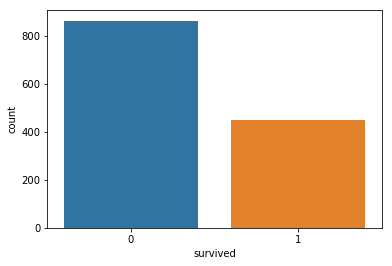

In [6]:
sns.countplot(data['survived'])

#### Pclass vs Survived

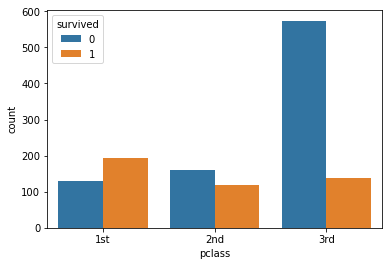

In [7]:
sns.countplot(data['pclass'], hue=data['survived'])

#### name info

In [8]:
data['name'].head()

0                       Allen, Miss Elisabeth Walton
1                        Allison, Miss Helen Loraine
2                Allison, Mr Hudson Joshua Creighton
3    Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                      Allison, Master Hudson Trevor
Name: name, dtype: object

#### transform attribution of name, getting title of name

In [9]:
data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])

In [10]:
data['name_title'].value_counts()

Mr           747
Miss         236
Mrs          200
Master        59
Ms            17
Dr             7
Rev            6
Thomas         2
Colonel        2
Major          2
Col            2
Rev.           2
the            1
Dr.            1
W.             1
Richard        1
Oscar          1
Jacobsohn      1
Hilda          1
Mlle           1
Eino           1
Albert         1
Delia          1
Mlle.          1
Simon          1
Seman          1
Nils           1
Khalil         1
Sir            1
Nikolai        1
Jonkheer       1
Sander         1
Jenny          1
Rene           1
Madame         1
William        1
Barton         1
Leo            1
Mansouer       1
Captain        1
Lady           1
Berglund.      1
Ernst          1
Name: name_title, dtype: int64

#### Title of name vs Survived

In [11]:
data['survived'].groupby(data['name_title']).mean()

name_title
Albert       0.000000
Barton       0.000000
Berglund.    0.000000
Captain      0.000000
Col          0.500000
Colonel      0.500000
Delia        0.000000
Dr           0.428571
Dr.          1.000000
Eino         1.000000
Ernst        0.000000
Hilda        1.000000
Jacobsohn    0.000000
Jenny        0.000000
Jonkheer     0.000000
Khalil       1.000000
Lady         1.000000
Leo          0.000000
Madame       1.000000
Major        0.500000
Mansouer     1.000000
Master       0.389831
Miss         0.588983
Mlle         0.000000
Mlle.        1.000000
Mr           0.144578
Mrs          0.740000
Ms           0.823529
Nikolai      0.000000
Nils         0.000000
Oscar        1.000000
Rene         0.000000
Rev          0.000000
Rev.         0.000000
Richard      0.000000
Sander       0.000000
Seman        0.000000
Simon        0.000000
Sir          1.000000
Thomas       0.000000
W.           0.000000
William      0.000000
the          1.000000
Name: survived, dtype: float64

#### length of name

In [12]:
data['name_len'] = data['name'].apply(lambda x: len(x))

#### Length of name vs Survived

In [13]:
data['survived'].groupby(pd.qcut(data['name_len'], 5)).mean()

name_len
(10.999, 17.0]    0.183746
(17.0, 20.0]      0.288321
(20.0, 24.0]      0.285171
(24.0, 28.0]      0.369295
(28.0, 62.0]      0.611111
Name: survived, dtype: float64

#### Sex vs Survived

In [14]:
data['sex'].value_counts(normalize=True)

male      0.647372
female    0.352628
Name: sex, dtype: float64

In [15]:
data['survived'].groupby(data['sex']).mean()

sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

#### Age vs Survived
- Missing data preprocessing 
  1 value: medium or mean  
  2 category/feature： major class

In [16]:
data['survived'].groupby(pd.qcut(data['age'], 5)).mean()

age
(0.166, 19.0]    0.578125
(19.0, 26.0]     0.354610
(26.0, 33.0]     0.400000
(33.0, 45.0]     0.447761
(45.0, 71.0]     0.443478
Name: survived, dtype: float64

#### Embarked vs Survived

In [17]:
data['embarked'].value_counts()
data['survived'].groupby(data['embarked']).mean()
sns.countplot(data['embarked'], hue=data['pclass'])

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64

embarked
Cherbourg      0.586207
Queenstown     0.311111
Southampton    0.399651
Name: survived, dtype: float64

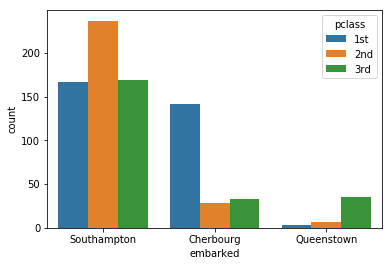

#### Destination vs Survived

In [20]:
data['survived'].groupby(data['home.dest'].apply(lambda x: str(x).split(',')[-1])).mean()

home.dest
 AB            1.000000
 AZ            0.000000
 Australia     0.000000
 BC            0.250000
 Birmingham    0.000000
                 ...   
Russia         1.000000
Southampton    0.666667
Spain          1.000000
Syria          0.000000
nan            0.180680
Name: survived, Length: 117, dtype: float64

#### room, ticket, boat missing too much，abandoned

#### Feature Transform

In [21]:
def name(data):
    data['name_len'] = data['name'].apply(lambda x: len(x))
    data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])
    del data['name']
    return data

def age(data):
    data['age_flag'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    grouped_age = data.groupby(['name_title', 'pclass'])['age']
    data['age'] = grouped_age.transform(lambda x: x.fillna(data['age'].mean()) if pd.isnull(x.mean()) else x.fillna(x.mean()))
    return data

def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton')
    return data


def dummies(data, columns=['pclass','name_title','embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x: str(x))
        new_cols = [col + '_' + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

#### preprocessing  
- drop unnecessary features 
- transform some kinds of features

In [22]:
drop_columns = ['row.names', 'home.dest', 'room', 'ticket', 'boat'] #+ ['ticket_len', 'ticket_title']
data = data.drop(drop_columns, axis=1)
data.head()

,pclass,survived,name,age,embarked,sex,name_title,name_len
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,female,Miss,28
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,female,Miss,27
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,male,Mr,35
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,female,Mrs,47
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,male,Master,29


In [23]:
data = name(data)
data = age(data)
data = embark(data)
data = dummies(data)
data.head()

,survived,age,name_len,age_flag,pclass_1st,pclass_2nd,pclass_3rd,name_title_Miss,name_title_Mr,name_title_Mrs,...,name_title_Simon,name_title_William,name_title_Seman,name_title_Rene,name_title_Leo,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
0,1,29.0000,28,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,2.0000,27,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,30.0000,35,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,25.0000,47,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0.9167,29,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


#### Training with decision tree model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=33)

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [26]:
measure_performance(testX, testY, model)

Accuracy:0.791 

Classification report
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       164
           1       0.88      0.52      0.65        99

    accuracy                           0.79       263
   macro avg       0.82      0.74      0.75       263
weighted avg       0.81      0.79      0.78       263
 

Confusion matrix
[[157   7]
 [ 48  51]] 



#### DT w/o feature engineering

In [27]:
sub_columns = ['age', 'sex_male','sex_female']
sub_trainX = trainX[sub_columns]
sub_testX = testX[sub_columns]
sub_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
sub_model.fit(sub_trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
measure_performance(sub_testX, testY, sub_model)

Accuracy:0.768 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.72      0.64      0.67        99

    accuracy                           0.77       263
   macro avg       0.76      0.74      0.75       263
weighted avg       0.76      0.77      0.77       263
 

Confusion matrix
[[139  25]
 [ 36  63]] 



#### visualizaion of DT

In [31]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=trainX.columns) 
graph = graphviz.Source(dot_data) 
# graph.render("titanic") 
graph.view()

'Source.gv.pdf'

#### display graph inline

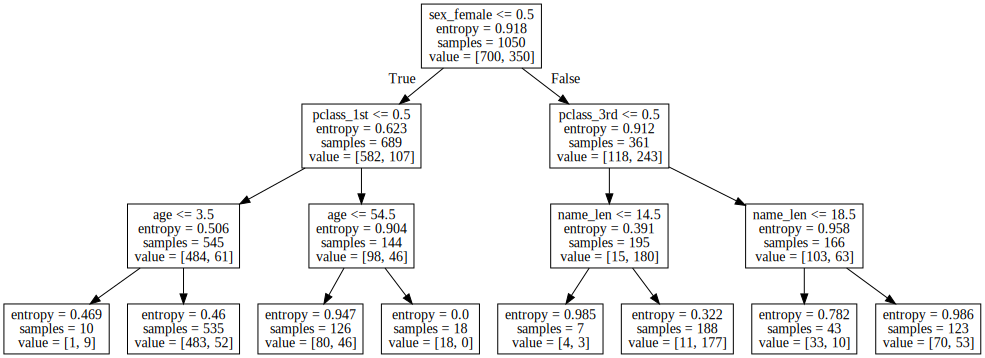

In [32]:
graph

#### feature importance

In [33]:
pd.concat([pd.DataFrame(trainX.columns, columns=['variable']),
         pd.DataFrame(model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:20]

,variable,importance
52,sex_female,0.553725
5,pclass_3rd,0.252415
0,age,0.095847
3,pclass_1st,0.063084
1,name_len,0.034928
51,embarked_Queenstown,0.000000
39,name_title_Sander,0.000000
30,name_title_Thomas,0.000000
31,name_title_Hilda,0.000000
32,name_title_Delia,0.000000
